<a href="https://colab.research.google.com/github/DanielBUBU/bigdata-class/blob/master/1217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pkgs <- c("tidyverse","lubridate")
install.packages("ggridges")
install.packages(pkgs)
install.packages("ggplot2")
install.packages("devtools")
devtools::install_github('cttobin/ggthemr')
install.packages("SportsAnalytics")
install.packages("showtext")
library(showtext)
showtext.auto(enable = TRUE)

library(ggthemr)
ggthemr("dust")
library(ggplot2)
library(ggridges)
library(tidyverse)
library(lubridate)
library(SportsAnalytics)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ggthemr' from a github remote, the SHA1 (3a86e281) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using formula 'y ~ x'



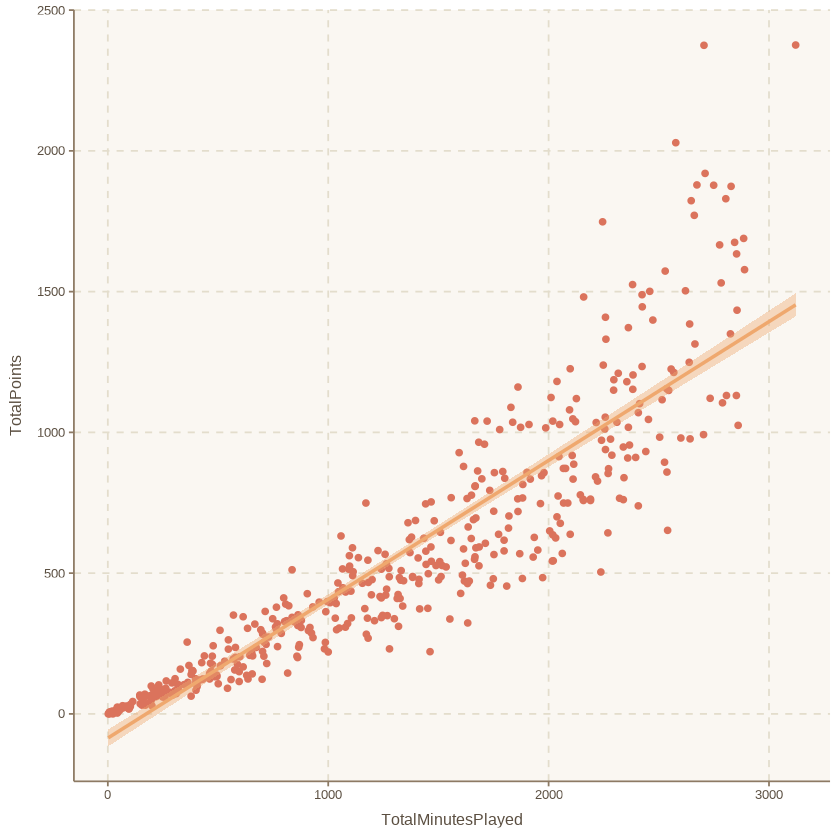

In [ ]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+
geom_point()+geom_smooth(method = "glm")

In [ ]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,
data =NBA1516)
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -1.799e+01           -2.347e-04            1.256e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    99360000 
Residual Deviance: 2160000 	AIC: 5367


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          22.852223            -0.006537             1.275721  
         PositionPF           PositionPG           PositionSF  
         -39.416327           -65.034646           -38.522299  
         PositionSG  
         -52.175144  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    99080000 
Residual Deviance: 1975000 	AIC: 5322

In [ ]:
OneVar<-glm(TotalPoints~TotalMinutesPlayed,data =NBA1516)
TwoVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,

data =NBA1516)

ThreeVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,

data =NBA1516)

c(OneVar$aic,TwoVar$aic,ThreeVar$aic)

[1] 6338.913 5366.763 5321.972

In [ ]:
sum2<-summary(TwoVar)
sum2$coefficients
sum3<-summary(ThreeVar)
sum3$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.798855e+01,5.659758251,-3.17832538,1.578333e-03
TotalMinutesPlayed,-2.347183e-04,0.009474631,-0.02477334,9.802462e-01
FieldGoalsAttempted,1.255794e+00,0.022239494,56.46682752,2.474028e-212


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),22.852222668,9.014714391,2.5349913,1.156964e-02
TotalMinutesPlayed,-0.006536874,0.009199968,-0.7105322,4.777281e-01
FieldGoalsAttempted,1.275721212,0.021647176,58.9324535,1.144607e-218
PositionPF,-39.416326742,9.936541704,-3.9668053,8.425605e-05
PositionPG,-65.034646215,10.269250388,-6.3329497,5.648565e-10
PositionSF,-38.522298887,10.488170409,-3.6729284,2.674727e-04
PositionSG,-52.175143670,9.985331185,-5.2251791,2.625062e-07


In [ ]:
install.packages("rpart")
library(rpart)
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1516)
DT

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



n=475 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 475 364 PF (0.15 0.23 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 132  74 C (0.44 0.35 0.098 0.053 0.061)  
      4) Blocks>=4.5 89  37 C (0.58 0.38 0.011 0.011 0.011) *
      5) Blocks< 4.5 43  31 PF (0.14 0.28 0.28 0.14 0.16)  
       10) Steals< 2.5 29  19 PF (0.17 0.34 0.14 0.21 0.14) *
       11) Steals>=2.5 14   6 PG (0.071 0.14 0.57 0 0.21) *
    3) ThreesMade>=2.5 343 242 SG (0.035 0.19 0.25 0.23 0.29)  
      6) Assists>=170.5 96  39 PG (0.031 0.052 0.59 0.15 0.18) *
      7) Assists< 170.5 247 163 SG (0.036 0.24 0.12 0.26 0.34)  
       14) Blocks>=20.5 80  42 PF (0.062 0.48 0 0.26 0.2)  
         28) Steals< 59.5 58  21 PF (0.069 0.64 0 0.14 0.16) *
         29) Steals>=59.5 22   9 SF (0.045 0.045 0 0.59 0.32) *
       15) Blocks< 20.5 167  99 SG (0.024 0.13 0.17 0.26 0.41)  
         30) Assists< 81.5 110  68 SG (0.027 0.18 0.091 0.32 0.38)  
        

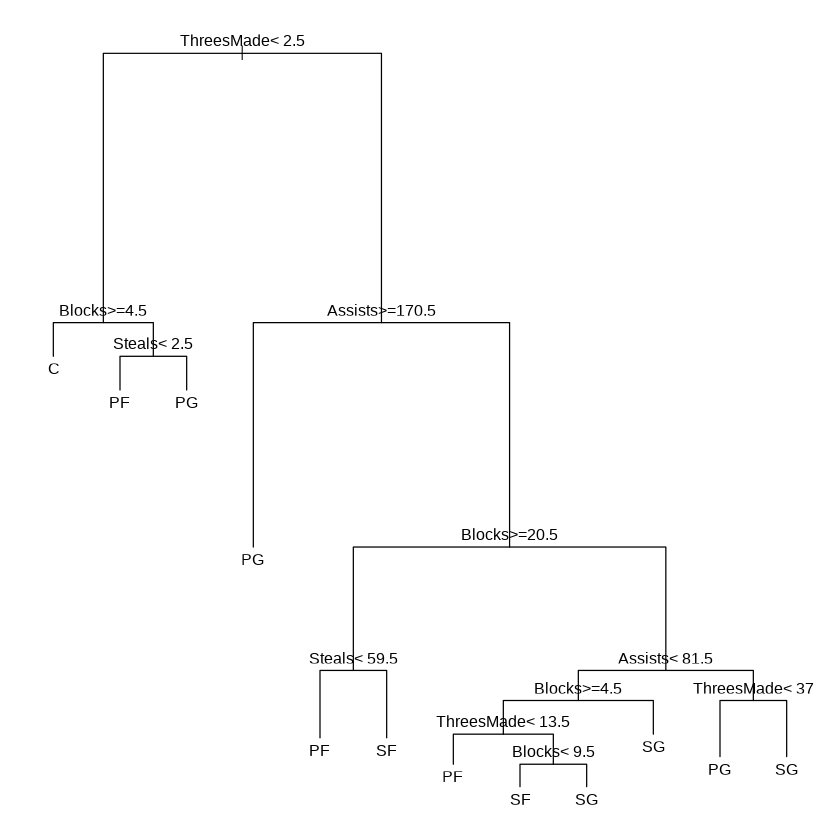

In [ ]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



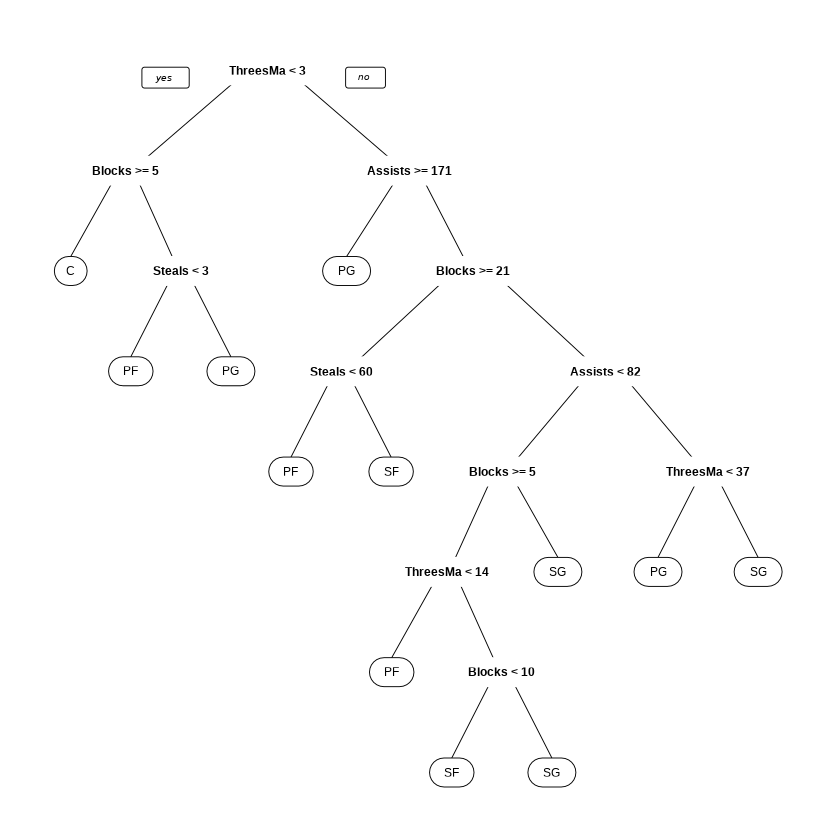

In [ ]:
install.packages("rpart.plot") 

library(rpart.plot)
prp(DT)

In [ ]:
mtcars.mxs<-as.matrix(mtcars)
d<-dist(mtcars.mxs) 
head(d)

[1]   0.6153251  54.9086059  98.1125212 210.3374396  65.4717710 241.4076490

[1]   0.815  79.300 108.795 275.430  84.640 347.960

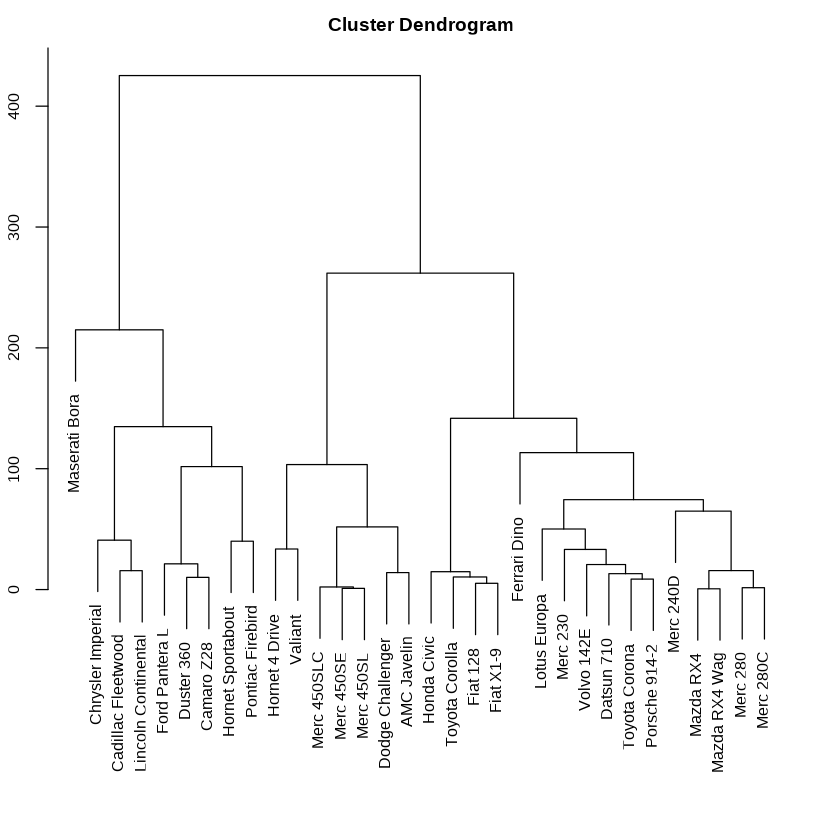

In [ ]:
d<-dist(mtcars.mxs, method="manhattan") 
head(d)
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs)) 
plot(hc)

Mazda RX4       Mazda RX4 Wag          Datsun 710           Merc 240D 
                  1                   1                   1                   1 
           Merc 230            Merc 280           Merc 280C            Fiat 128 
                  1                   1                   1                   1 
        Honda Civic      Toyota Corolla       Toyota Corona           Fiat X1-9 
                  1                   1                   1                   1 
      Porsche 914-2        Lotus Europa        Ferrari Dino          Volvo 142E 
                  1                   1                   1                   1 
     Hornet 4 Drive             Valiant          Merc 450SE          Merc 450SL 
                  2                   2                   2                   2 
        Merc 450SLC    Dodge Challenger         AMC Javelin   Hornet Sportabout 
                  2                   2                   2                   3 
         Duster 360          Camaro Z28    Pontiac Firebird      Ford Pantera L 
                  3                   3                   3                   3 
 Cadillac Fleetwood Lincoln Continental   Chrysler Imperial       Maserati Bora 
                  4                   4                   4                   5

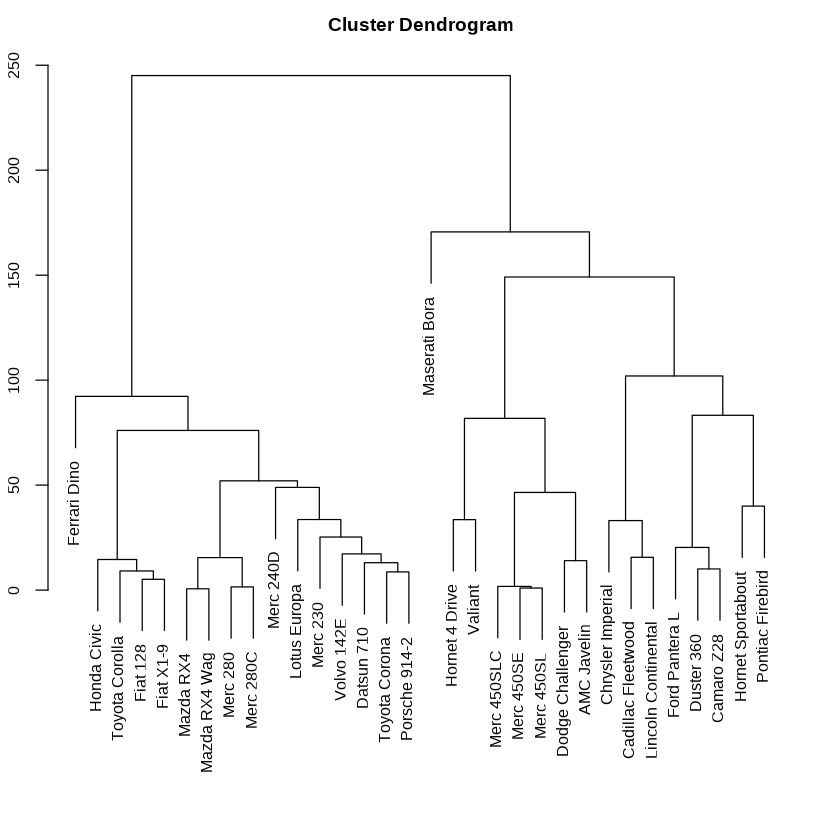

In [ ]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs),method="average") 
plot(hc)
clusterCut <- cutree(hc, k=5) 
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   2                   3 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  4                   5                   6                   7 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  8                   9                   9                  10 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                 10                  10                  11                  12 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                 13                  14                  15                  16 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                 17                  18                  19                  20 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                 21                  22                  23                  24 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                 25                  26                  27                  28

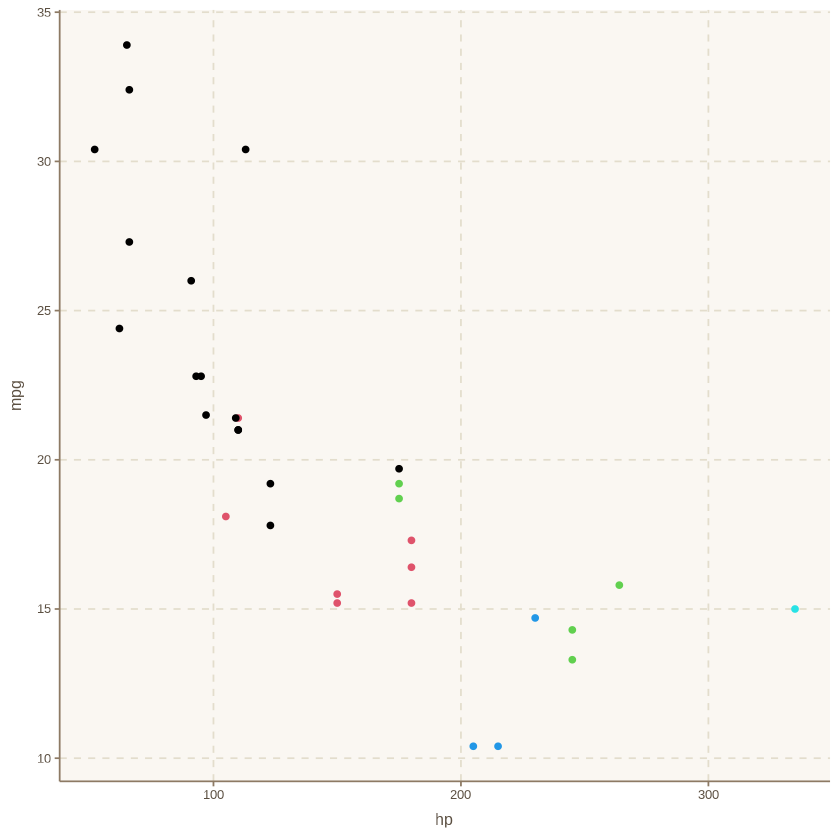

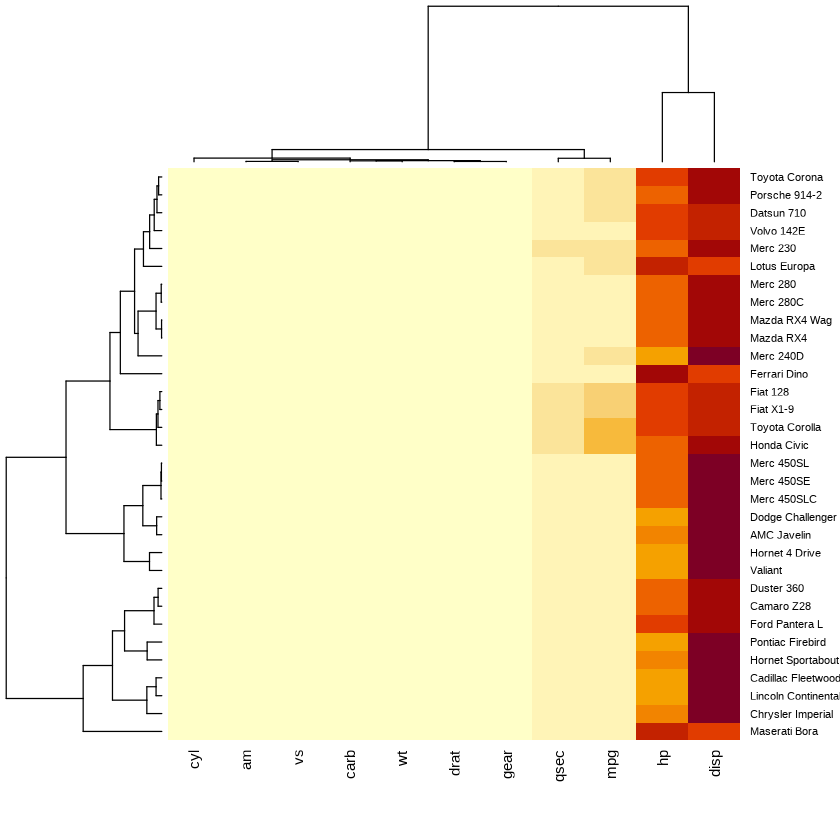

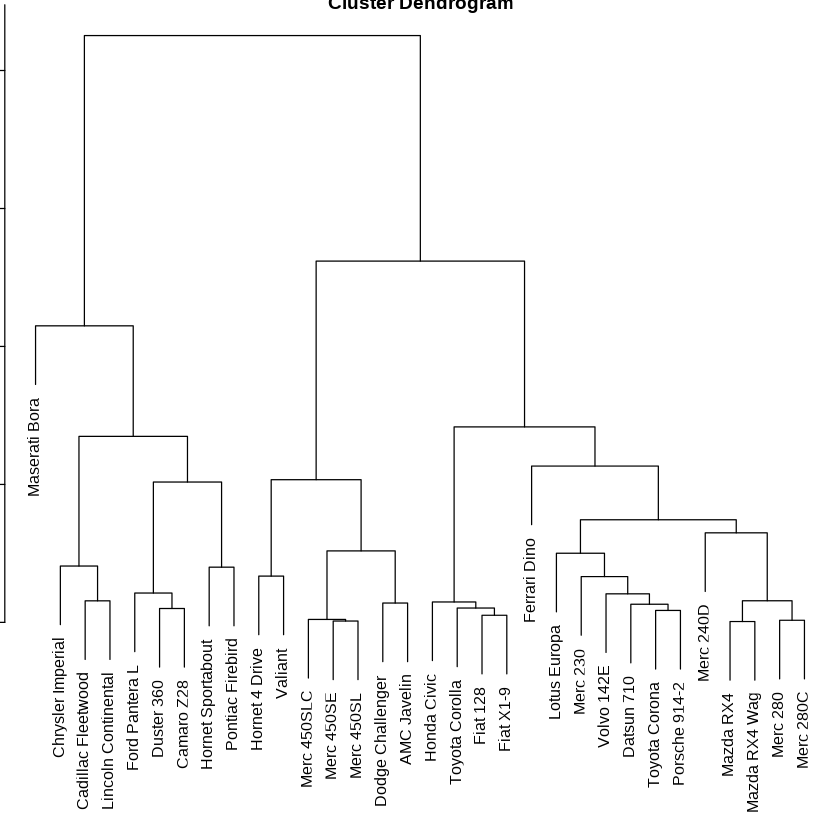

In [ ]:
ggplot()+geom_point(data=mtcars,

aes(x=hp,y=mpg,color=as.factor(clusterCut)))
clusterCut <- cutree(hc,h =4) 
sort(clusterCut)
par(mar=rep(0.2,4),mfrow=c(1,1))
heatmap(mtcars.mxs)
distxy <- dist(mtcars.mxs)
hClustering <- hclust(distxy)
plot(hClustering)

ERROR: ignored

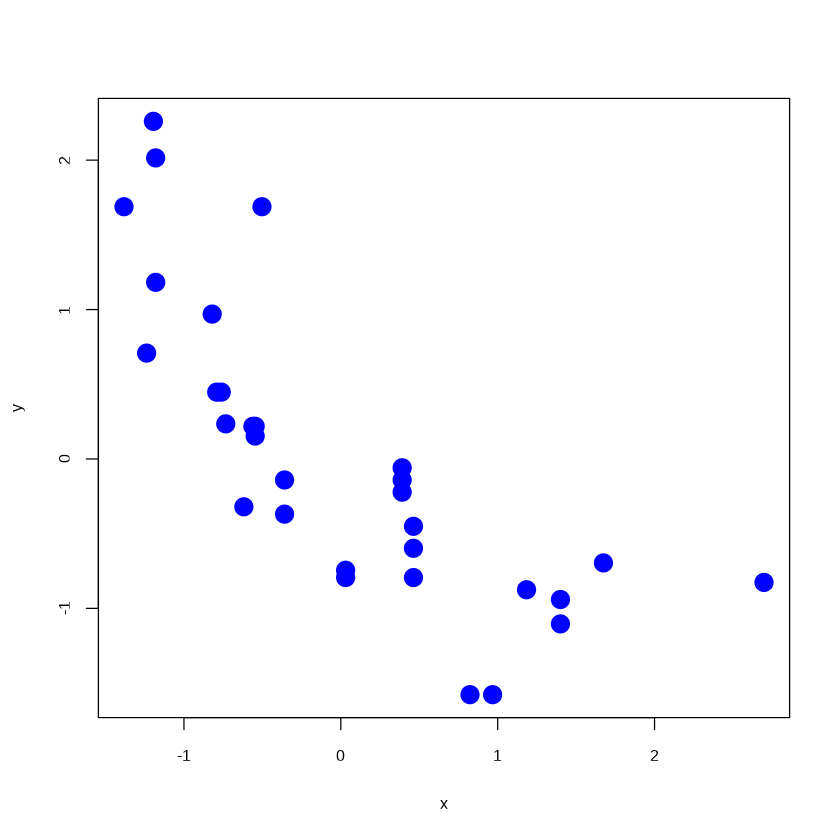

In [ ]:
x<-scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

[1] 3 1 3 3 3 2 1 1 3 3 3 3 3 2 2 2 1 1 1 3 3 3 2 3 1 1 1 2 3 2 3

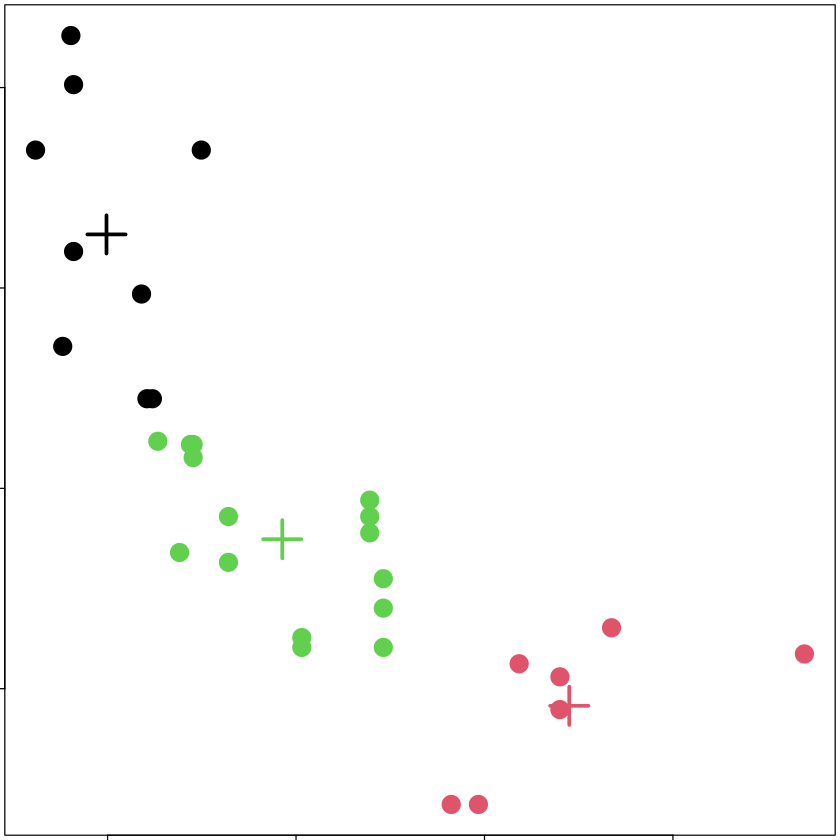

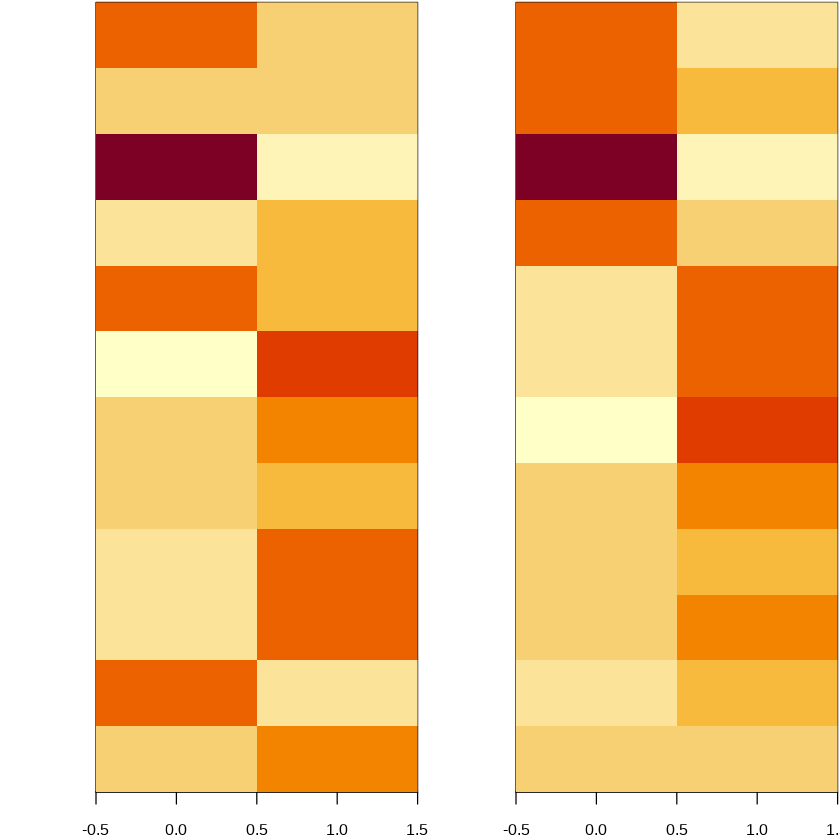

In [ ]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame,centers=3)
names(kmeansObj)
kmeansObj$cluster
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)
set.seed(1234)
dataMatrix <- as.matrix(dataFrame)[sample(1:12),]
kmeansObj <- kmeans(dataMatrix,centers=3)
par(mfrow=c(1,2), mar = c(2, 4, 0.1, 0.1))
image(t(dataMatrix)[,nrow(dataMatrix):1],yaxt="n")
image(t(dataMatrix)[,order(kmeansObj$cluster)],yaxt="n")

In [ ]:
if (!require('arules')){
install.packages("arules");
library(arules) #for Apriori演算法
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) #for Groceries data
}
data(Groceries) # Load the data set
Groceries@data@Dim #169 種商品,9835筆交易資料

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




[1]  169 9835

In [ ]:
rules <- apriori(Groceries, # data= Groceries

parameter = list(supp = 0.001, conf = 0.8), #參數最低限度
control = list(verbose=F)) #不要顯示output

options(digits=2) # Only 2 digits
inspect(rules[1:5]) # Show the top 5 rules
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   
    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                             

In [ ]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="whole milk"), #設定右邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesR[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [ ]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
appearance = list(default="rhs",lhs="whole milk"), #設定左邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesL[1:5])
if (!require('arulesViz')){
install.packages("arulesViz");
library(arulesViz)
}
#Mac->http://planspace.org/2013/01/17/fix-r-tcltk-dependency-problem-on-mac/
plot(rules,method="graph",interactive=TRUE,shading=NA)

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


Loading required package: arulesViz

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arulesViz’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘hexbin’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’


Warning message in install.packages("arulesViz"):
“installation of package ‘gplots’ had non-zero exit status”
Warning message in install.packages("arulesViz"):
“installation of package ‘seriation’ had non-zero exit status”
Warning message in install.packages("arulesViz"):
“installation of package ‘arulesViz’ had non-zero exit status”


ERROR: ignored